my own 


In [ ]:
pip install gtts googletrans soundfile librosa numpy noisereduce

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install simpleaudio 

In [ ]:
import tkinter as tk
from tkinter import ttk
from gtts import gTTS
from googletrans import Translator
import soundfile as sf
import librosa
import numpy as np
import noisereduce
import threading

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox, Button
import pyttsx3
import googletrans
import threading
import time  # For introducing pauses
import random # For slight variations

In [ ]:
# List of supported languages and their codes (expanded)
language_options = {
    "Amharic": "am",
    "Arabic": "ar",
    "Armenian": "hy",
    "Azerbaijani Rasour": "az",  # Assuming Azerbaijani
    "Belarusian": "be",
    "Bengali": "bn",
    "Bulgarian": "bg",
    "Burmese": "my",
    "Catalan": "ca",
    "Cebuano": "ceb",
    "Chichewa": "ny",
    "Chinese": "zh-CN",  # Simplified Chinese as default
    "Corsican": "co",
    "Czech": "cs",
    "Dari": "prs",
    "Dutch": "nl",
    "English": "en",
    "Esperanto": "eo",
    "Estonian": "et",
    "Finnish": "fi",
    "Flemish": "nl",  # Treated as Dutch
    "French": "fr",
    "Ga": "ga",
    "Georgian": "ka",
    "German": "de",
    "Greek": "el",
    "Gujarati": "gu",
    "Hausa": "ha",
    "Hawaiian Creole": "haw",
    "Hebrew": "he",
    "Hindi": "hi",
    "Hmong": "hmn",
    "Hungarian": "hu",
    "Icelandic": "is",
    "Igbo": "ig",
    "Indonesian": "id",
    "Irish": "ga",
    "Italian": "it",
    "Japanese": "ja",
    "Javanese": "jv",
    "Kannada": "kn",
    "Kazakh": "kk",
    "Khmer": "km",
    "Korean": "ko",
    "Kurdish": "ku",
    "Kyrgyz": "ky",
    "Lao": "lo",
    "Latin": "la",
    "Latvian": "lv",
    "Lithuanian": "lt",
    "Luxembourgish": "lb",
    "Macedonian": "mk",
    "Malagasy": "mg",
    "Malay": "ms",
    "Malayalam": "ml",
    "Maltese": "mt",
    "Maori": "mi",
    "Marathi": "mr",
    "Mongolian": "mn",
    "Nepali": "ne",
    "Norwegian": "no",
    "Pashto": "ps",
    "Persian": "fa",
    "Polish": "pl",
    "Portuguese": "pt",
    "Punjabi": "pa",
    "Romanian": "ro",
    "Russian": "ru",
    "Samoan": "sm",
    "Scottish Gaelic": "gd",
    "Serbian": "sr",
    "Shona": "sn",
    "Sindhi": "sd",
    "Sinhala": "si",
    "Slovak": "sk",
    "Slovenian": "sl",
    "Somali": "so",
    "Sotho": "st",
    "Spanish": "es",
    "Sundanese": "su",
    "Swahili": "sw",
    "Swedish": "sv",
    "Tagalog": "tl",
    "Tajik": "tg",
    "Tamil": "ta",
    "Telugu": "te",
    "Thai": "th",
    "Tibetan": "bo",
    "Turkish": "tr",
    "Turkmen": "tk",
    "Ukrainian": "uk",
    "Urdu": "ur",
    "Uzbek": "uz",
    "Vietnamese": "vi",
    "Welsh": "cy",
    "West Frisian": "fy",
    "Xhosa": "xh",
    "Yiddish": "yi",
    "Yoruba": "yo",
    "Zulu": "zu"
}

In [ ]:
# Create the main window
root = tk.Tk()
root.title("PLAY~TTS")
root.geometry("400x550")
root.configure(bg="#f0ffff")


In [ ]:
trial

In [ ]:
#########################################################################

############################################################################

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import nltk
import re

In [ ]:
# Specify the filename
input_file = 'holmes.txt'

# Read the contents of the file
with open(input_file, 'r', encoding='utf-8') as infile:
    data = infile.read()

In [ ]:
data[:100] # view first few characters

"*Project Gutenberg's Etext of Tom Swift And His Submarine Boat*\n\n#4 in the Victor Appleton's Tom Swi"

In [ ]:

# Limit data to 500000 characters
data = data[:700000]


In [ ]:
# Function to remove emojis and special characters from text
def remove_emojis_and_special_characters(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    
    return text

In [ ]:
# Preprocessing pipeline
def preprocess_pipeline(data) -> 'list':
    # Split by newline character
    sentences = data.split('\n')
    for i in range(len(sentences)):
        sentences[i] = remove_emojis_and_special_characters(sentences[i])
    # Remove leading and trailing spaces
    sentences = [s.strip() for s in sentences]
    # Drop empty sentences
    sentences = [s for s in sentences if len(s) > 0]
    # Tokenization
    tokenized = []
    for sentence in sentences:
        # Convert to lowercase
        sentence = sentence.lower()
        tokenized.append(sentence)
    return tokenized

# Tokenize sentences
tokenized_sentences = preprocess_pipeline(data)

In [ ]:
"""
What is an OOV Token?
An out-of-vocabulary (OOV) token is a special token used in natural language processing (NLP) tasks to represent words that
are not present in the vocabulary of the model or tokenizer. When a word that is not in the vocabulary is encountered during
tokenization or text processing, it is replaced with the OOV token.

Why Use an OOV Token?
Using an OOV token helps handle unseen or unknown words during the training or inference phase of an NLP model. 
Instead of encountering errors or issues when encountering unknown words, the model can gracefully handle them by
representing them with the OOV token. This is particularly useful when working with real-world data where the vocabulary
of the model may not cover all possible words.
"""
# Tokenize words
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(tokenized_sentences)
total_words = len(tokenizer.word_index) + 1
# tokenizer.word_counts
# tokenizer.word_index
"""
n_gram example:
[3, 15, 8, 7, 20, 12, 6]

For the above sentece sentence, the code would generate the following n-gram sequences:

[3, 15]
[3, 15, 8]
[3, 15, 8, 7]
[3, 15, 8, 7, 20]
[3, 15, 8, 7, 20, 12]
[3, 15, 8, 7, 20, 12, 6]
"""

# Generate input sequences
input_sequences = []
for line in tokenized_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# Creates labels with input sequences
X,labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [ ]:
# Define your model
model = Sequential()
model.add(Embedding(total_words, 100)) 
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
#OPTIMIZER
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
history = model.fit(X_train_temp, y_train_temp, epochs=10, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 147s 51ms/step - accuracy: 0.0956 - loss: 6.4048 - val_accuracy: 0.1175 - val_loss: 6.5559
Epoch 2/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 123s 45ms/step - accuracy: 0.1245 - loss: 6.0961 - val_accuracy: 0.1357 - val_loss: 6.1901
Epoch 3/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 136s 49ms/step - accuracy: 0.1444 - loss: 5.3301 - val_accuracy: 0.1335 - val_loss: 6.4317
Epoch 4/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 140s 51ms/step - accuracy: 0.1557 - loss: 5.0748 - val_accuracy: 0.1255 - val_loss: 6.8938
Epoch 5/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 138s 50ms/step - accuracy: 0.1629 - loss: 4.9501 - val_accuracy: 0.1358 - val_loss: 7.1217
Epoch 6/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 128s 46ms/step - accuracy: 0.1702 - loss: 4.7703 - val_accuracy: 0.1272 - val_loss: 7.3846
Epoch 7/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 141s 51ms/step - accuracy: 0.1736 - loss: 4.7679 - val_accuracy: 0.1312 - val_loss: 7.7172
Epoch 8/10
2774/2774 ━━━━━━━━━━━━━━━━━━━━ 147s 53ms/step - accuracy: 

In [ ]:
# Save model architecture as JSON file
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Load model architecture from JSON file
from tensorflow.keras.models import model_from_json

with open("lstm_model.json", "r") as json_file:
    loaded_model_json = json_file.read()

# # Create model from loaded architecture
loaded_model = model_from_json(loaded_model_json)

print("Model architecture loaded successfully from JSON file.")


# 7. Save your trained model  <--- THIS IS THE KEY STEP
model.save('my_language_model.h5')  # Save it to a file!

Model architecture loaded successfully from JSON file.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

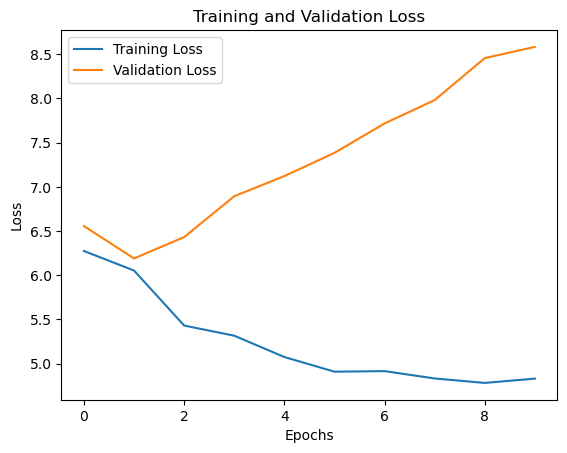

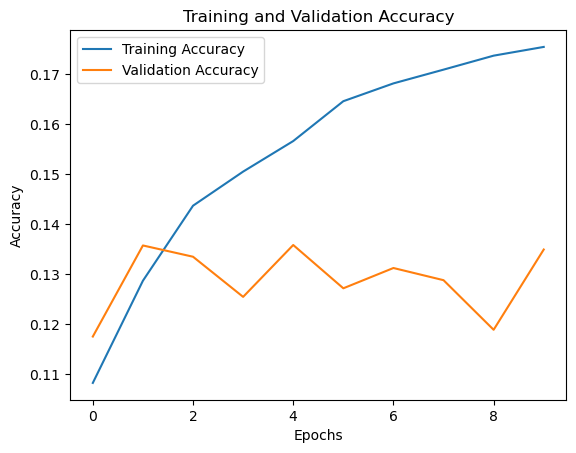

In [ ]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import pickle
tokenizer_file_path = r"C:\Users\nkavi\OneDrive\Desktop\play~tts\tokenizer.pickle"
try:
    
    pickle.dump(tokenizer,open(tokenizer_file_path,'wb'))
    print(f"Tokenizer successfully saved to: {tokenizer_file_path}")  # Confirm success
except Exception as e:
    print(f"Error saving tokenizer: {e}")  # Print any error message
    # Handle the error (e.g., exit, raise an exception)

Tokenizer successfully saved to: C:\Users\nkavi\OneDrive\Desktop\play~tts\tokenizer.pickle


code to make the tokenizer and loading the model

In [ ]:
from tensorflow.keras.models import model_from_json, load_model
import pickle

# --- Load model weights and other components if architecture loaded successfully ---
if loaded_model is not None:
    try:
        # Load the model weights from the .h5 file
        loaded_model.load_weights('my_language_model.h5')  # Load the weights into the loaded model
        # Load the tokenizer
        tokenizer_file_path = r'C:\Users\nkavi\OneDrive\Desktop\play~tts\tokenizer.pickle'
        print(f"Attempting to load tokenizer from: {tokenizer_file_path}")  # Debug
        if not os.path.exists(tokenizer_file_path):
            raise FileNotFoundError(f"Tokenizer file not found at: {tokenizer_file_path}")
        with open(tokenizer_file_path, 'rb') as handle:
            tokenizer = pickle.load(handle)
        print(f"pickle.load returned: {tokenizer}") # Debug
        if tokenizer is None:
            print("ERROR: pickle.load returned None!") #IMPORTANT
     
        max_sequence_len = 25
        print("Model architecture, weights, and tokenizer loaded successfully.")
    except Exception as e:
        print(f"Error loading model weights or tokenizer: {e}")
        # Optionally, you could set loaded_model = None here if loading weights fails
        #  depending on how you want your program to handle this scenario.
        tokenizer = None
        max_sequence_len = None
else:
  tokenizer = None
  max_sequence_len = None
print(f"Tokenizer: {tokenizer}")
print(f"Max Sequence Length: {max_sequence_len}")

Attempting to load tokenizer from: C:\Users\nkavi\OneDrive\Desktop\play~tts\tokenizer.pickle
pickle.load returned: <keras.src.legacy.preprocessing.text.Tokenizer object at 0x000001B3BC0E42F0>
Model architecture, weights, and tokenizer loaded successfully.
Tokenizer: <keras.src.legacy.preprocessing.text.Tokenizer object at 0x000001B3BC0E42F0>
Max Sequence Length: 25


In [ ]:
def predict_top_five_words(model, tokenizer, seed_text):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    top_five_indexes = np.argsort(predicted[0])[::-1][:5]
    top_five_words = []
    for index in top_five_indexes:
        for word, idx in tokenizer.word_index.items():
            if idx == index:
                top_five_words.append(word)
                break
    return top_five_words

using with enhanced output feature

In [ ]:
#################################################################
GOOD JOB @

but no transaltion between the text

In [ ]:
pip install gtts pydub

In [ ]:
pip install langdetect


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------- ----------------------------- 262.1/981.5 kB ? eta -:--:--
     -------------------------------------- 981.5/981.5 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993251 sha256=f3d3a691154ac73ae0e628b99b0c933008c0ee6481463726fcdee46582b36802
  Stored in directory: c:\users\nkavi\appdata\local\pip\cache\wheels\c1\67\88\e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [ ]:
final final @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [5]:
pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install ffprobe

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pydub import AudioSegment
AudioSegment.converter =r"c:\\Users\\nkavi\\anaconda3\\Lib\\site-packages\\ffmpeg"  # Update with correct path

In [12]:
import ffmpeg
print(ffmpeg)


<module 'ffmpeg' from 'c:\\Users\\nkavi\\anaconda3\\Lib\\site-packages\\ffmpeg\\__init__.py'>


this ffmpeg didnt denied access to my laptop

In [2]:
import pygame
import tkinter as tk
import threading

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pyimage

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyimage: filename=pyimage-0.1.1-py3-none-any.whl size=5031 sha256=f0e525f091d616bc3590701d480619369e5dafc836186f14e3edacb04367a8bf
  Stored in directory: c:\users\nkavi\appdata\local\pip\cache\wheels\be\b1\49\a7384f954311ac46d84bfa0bacda9d96cd9a84689714303666
Successfully built pyimage
Note: you may need to restart the kernel to use updated packages.


In [5]:
def speak_text():
    def play_audio():
        tts="translation_1746716009.3997695.mp3"
        #play 
        pygame.mixer.init()
        pygame.mixer.music.load(tts)
        pygame.mixer.music.play()

        #wait untill done
        while pygame.mixer.music.get_busy():
            time.sleep(0.1)
    threading.Thread(target=play_audio,daemon=True).start()

rt=tk.Tk()
rt.title("text to speech")
entry = tk.Entry(rt,width=100,)
entry.pack(padx=10,pady=5)
sp_bt=tk.Button(rt,text="Speak",command=speak_text)
sp_bt.pack(pady=5)
rt.mainloop()  

KeyboardInterrupt: 

In [ ]:
#main code after final aboves are the background and speak button checking

perfefct perfect perfect @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
pip install mutagen

In [ ]:
pip install pydub pygame mutagen gtts

In [1]:
import tkinter as tk
from tkinter import ttk, messagebox, Button, scrolledtext, Toplevel
import googletrans
import threading
import time
import random
import numpy as np
import pickle
import os
import socket
import requests
from gtts import gTTS
import pygame
import tempfile
from pydub import AudioSegment
import wave
import simpleaudio as sa
from langdetect import detect, LangDetectException
import traceback
from tensorflow.keras.models import load_model  # Import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import pad_sequences


# Global variables
floating_predictions_window = None
model = None
tokenizer = None
max_sequence_len = 0
current_audio_file = None  # To track the current audio file being played
volume_level = 80  # Store the volume level
speaking_speed_multiplier = 1.0  # default speed
STOP_REQUESTED = False
AUDIO_FILE_DIR = r"C:\Users\nkavi\OneDrive\Desktop\play~tts"  # Directory to save audio files
# Ensure the audio file directory exists
if not os.path.exists(AUDIO_FILE_DIR):
    os.makedirs(AUDIO_FILE_DIR)

def check_internet_connection():
    """Check if there's an active internet connection."""
    try:
        # Try to connect to Google's DNS server
        socket.create_connection(("8.8.8.8", 53), timeout=3)
        return True
    except OSError:
        pass
    try:
        # Try to access Google
        requests.get("https://www.google.com", timeout=3)
        return True
    except requests.exceptions.RequestException:
        return False

try:
    if os.path.exists('my_language_model.h5') and os.path.exists('tokenizer.pickle'):
        model = load_model('my_language_model.h5')
        with open('tokenizer.pickle', 'rb') as handle:
            tokenizer = pickle.load(handle)
        max_sequence_len = 25
    else:
        print("Warning: Model files not found. Prediction features will be disabled.")
except Exception as e:
    print(f"Error loading model: {str(e)}")
    model = None
    tokenizer = None
    max_sequence_len = 0

def predict_top_five_words(model, tokenizer, seed_text, max_sequence_len):
    try:
        if model is None or tokenizer is None:
            return []

        if not seed_text.strip():
            return []

        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        top_five_indexes = np.argsort(predicted[0])[::-1][:5]

        top_five_words = []
        for index in top_five_indexes:
            for word, idx in tokenizer.word_index.items():
                if idx == index:
                    top_five_words.append(word)
                    break
        return top_five_words[:5]
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        return []

def show_predictions(event=None):
    if model is None or tokenizer is None:
        return

    try:
        current_text = text_area.get("1.0", tk.END).strip()
        if not current_text:
            hide_predictions()
            return

        cursor_index = text_area.index(tk.INSERT)
        line, char = map(int, cursor_index.split('.'))
        prefix_text = text_area.get(f"{line}.0", cursor_index).strip()

        if prefix_text:
            top_words = predict_top_five_words(model, tokenizer, prefix_text, max_sequence_len)
            if top_words:
                display_floating_predictions(top_words, cursor_index)
            else:
                hide_predictions()
        else:
            hide_predictions()
    except Exception as e:
        print(f"Error showing predictions: {str(e)}")
        hide_predictions()

def add_word(word):
    try:
        cursor_index_before_insert = text_area.index(tk.INSERT)
        text_area.insert(cursor_index_before_insert, f" {word}")

        line, char = map(int, cursor_index_before_insert.split('.'))
        new_char = char + len(word) + 1
        text_area.mark_set(tk.INSERT, f"{line}.{new_char}")
        text_area.see(tk.INSERT)

        window.after(100, show_predictions)
        hide_predictions()
    except Exception as e:
        print(f"Error adding word: {str(e)}")

def display_floating_predictions(words, cursor_index):
    global floating_predictions_window

    hide_predictions()

    if words:
        try:
            floating_predictions_window = Toplevel(window)
            floating_predictions_window.transient(window)
            floating_predictions_window.overrideredirect(True)

            x, y, _, _ = text_area.bbox(cursor_index)
            if x is None or y is None:
                x, y = 0, 20

            text_x, text_y = text_area.winfo_rootx(), text_area.winfo_rooty()
            prediction_x = text_x + x
            prediction_y = text_y + y + 20

            floating_predictions_window.geometry(f"+{prediction_x}+{prediction_y}")

            for i, word in enumerate(words):
                btn = Button(floating_predictions_window, text=word,
                             command=lambda w=word: add_word(w),
                             relief=tk.FLAT, bg="#f0f0f0", padx=2, pady=1)
                btn.pack(side="left", padx=1, pady=1)

            floating_predictions_window.deiconify()
            floating_predictions_window.lift()

            floating_predictions_window.bind("<Escape>", lambda e: hide_predictions())
        except Exception as e:
            print(f"Error displaying predictions: {str(e)}")
            if floating_predictions_window:
                floating_predictions_window.destroy()
            floating_predictions_window = None

def hide_predictions(event=None):
    global floating_predictions_window
    if floating_predictions_window:
        try:
            floating_predictions_window.destroy()
        except:
            pass
        floating_predictions_window = None

# Initialize translator
translator = googletrans.Translator()

# List of supported languages and their codes
language_options = {
     "Afrikaans": "af", "Arabic": "ar", "Bulgarian": "bg", "Bengali": "bn",
    "Bosnian": "bs", "Catalan": "ca", "Czech": "cs", "Welsh": "cy",
    "Danish": "da", "German": "de", "Greek": "el", "English": "en",
    "Spanish": "es", "Estonian": "et", "Finnish": "fi", "French": "fr",
    "Gujarati": "gu", "Hindi": "hi", "Croatian": "hr", "Hungarian": "hu",
    "Indonesian": "id", "Icelandic": "is", "Italian": "it", "Hebrew": "iw",
    "Japanese": "ja", "Javanese": "jw", "Khmer": "km", "Kannada": "kn",
    "Korean": "ko", "Latin": "la", "Latvian": "lv", "Malayalam": "ml",
    "Marathi": "mr", "Malay": "ms", "Burmese": "my", "Nepali": "ne",
    "Dutch": "nl", "Norwegian": "no", "Polish": "pl", "Portuguese": "pt",
    "Romanian": "ro", "Russian": "ru", "Sinhala": "si", "Slovak": "sk",
    "Albanian": "sq", "Serbian": "sr", "Sundanese": "su", "Swedish": "sv",
    "Swahili": "sw", "Tamil": "ta", "Telugu": "te", "Thai": "th",
    "Filipino": "tl", "Turkish": "tr", "Ukrainian": "uk", "Urdu": "ur",
    "Vietnamese": "vi", "Chinese (Simplified)": "zh-CN", "Chinese (Mandarin/Taiwan)": "zh-TW"
}

# Create the main window
window = tk.Tk()
window.title("PLAY~TTS")
window.geometry("400x600")
window.configure(bg="#f0ffff")

# Header
header = tk.Label(window, text="🟩PLAY~TTS", font=("Helvetica", 18, "bold"), bg="#f8f8f8")
header.pack(pady=10)

# Tabs
tab_frame = tk.Frame(window, bg="#f0ffff")
tab_frame.pack(pady=5)

open_audio_btn = tk.Button(tab_frame, text="Text to Speech", bg="#d1d1d1", width=20)
open_audio_btn.grid(row=0, column=0, padx=2)

# Settings
settings_label = tk.Label(window, text="Settings", font=("Helvetica", 12, "bold"), bg="#f0ffff")
settings_label.pack(pady=10)

# Language Dropdown
language_label = tk.Label(window, text="Target Language:", bg="#f3e8ff")
language_label.pack()
language_var = tk.StringVar()
languages = sorted(language_options.keys())
language_dropdown = ttk.Combobox(window, textvariable=language_var, values=languages)
language_dropdown.set("English")
language_dropdown.pack(pady=5)

# Voice Dropdown
voice_label = tk.Label(window, text="Voice Gender:", bg="#f8f8f8")
voice_label.pack()
voice_var = tk.StringVar()
voices = ["Male", "Female"]
voice_dropdown = ttk.Combobox(window, textvariable=voice_var, values=voices)
voice_dropdown.set("Female")
voice_dropdown.pack(pady=5)

# Speed Dropdown
speed_label = tk.Label(window, text="Speech Speed:", bg="#f8f8f8")
speed_label.pack()
speed_var = tk.StringVar()
speeds = ["Fast", "Medium", "Slow"]
speed_dropdown = ttk.Combobox(window, textvariable=speed_var, values=speeds)
speed_dropdown.set("Medium")
speed_dropdown.pack(pady=5)

def update_speed_multiplier():
    global speaking_speed_multiplier
    selected_speed = speed_var.get()
    if selected_speed == "Fast":
        speaking_speed_multiplier = 1.5  # Increased speed
    elif selected_speed == "Slow":
        speaking_speed_multiplier = 0.5  # Reduced speed
    else:
        speaking_speed_multiplier = 1.0  # Medium speed
speed_var.trace_add("write", lambda *args: update_speed_multiplier())  # Track changes


# Volume Scale
volume_label = tk.Label(window, text="Volume:", bg="#f8f8f8")
volume_label.pack()
volume_scale = tk.Scale(window, from_=0, to=100, orient=tk.HORIZONTAL, bg="#f8f8f8",
                            command=lambda v: change_volume(int(v)))
volume_scale.set(volume_level)  # Default volume
volume_scale.pack(pady=5)

def change_volume(value):
    """Adjust the volume (this is a placeholder as playsound has no direct volume control)."""
    global volume_level
    volume_level = value
    #  playsound doesn't have a direct way to set volume.
    #  If you were using a different library (like simpleaudio), you would
    #  set the volume here.  For playsound, we'll just store it.
    print(f"Volume set to {volume_level}")  # Keep for debugging

# Input Text Box
input_text_label = tk.Label(window, text="Input Text", bg="#f8f8f8")
input_text_label.pack()
text_area = scrolledtext.ScrolledText(window, height=5, width=40, wrap=tk.WORD)
text_area.insert(tk.END, "Type or paste text here.")
text_area.pack(pady=5)

# Bind text input events
text_area.bind("<KeyRelease>", show_predictions)
text_area.bind("<Button-1>", show_predictions)
text_area.bind("<FocusOut>", hide_predictions)

# Output Text Box
output_text_label = tk.Label(window, text="Translated Text", bg="#e0ffe0")
output_text_label.pack()
output_text = tk.Text(window, height=5, width=40, state=tk.NORMAL, wrap=tk.WORD)
output_text.pack(pady=5)

# Configure speaking highlight tag
output_text.tag_configure("speaking", background="yellow", foreground="black")

# Token Counter & Quota
quota_label = tk.Label(window, text="0 / 500 \u00A0\u00A0\u00A0\u00A0Total quota remaining: 50", bg="#f8f8f8")
quota_label.pack()

def translate_text_output():
    """Translates the input text and displays it in the output text box."""
    if not check_internet_connection():
        messagebox.showerror("Network Error", "No internet connection. Please check your network and try again.")
        return

    text = text_area.get("1.0", tk.END).strip()
    if not text:
        messagebox.showwarning("Input Error", "Please enter some text to translate.")
        return

    language = language_var.get()
    if language not in language_options:
        messagebox.showwarning("Language Error", "Selected language is not supported.")
        return

    try:
        translated_text = translator.translate(text, dest=language_options[language]).text
        output_text.config(state=tk.NORMAL)
        output_text.delete("1.0", tk.END)
        output_text.insert(tk.END, translated_text)
        output_text.config(state=tk.NORMAL)
    except Exception as e:
        error_message = f"Translation failed: {str(e)}"
        if "timed out" in str(e).lower():
            error_message = "Translation timed out. Please check your internet connection."
        messagebox.showerror("Translation Error", error_message)
        output_text.config(state=tk.NORMAL)
        output_text.delete("1.0", tk.END)
        output_text.insert(tk.END, "Translation failed - check network")
        output_text.config(state=tk.NORMAL)

def speak_humanized(text, target_textbox=None):
    """Speaks text with gTTS and highlights words as they're spoken."""
    global current_audio_file, STOP_REQUESTED, AUDIO_FILE_DIR, current_play_obj, volume_level,speaking_speed_multiplier

    if not text.strip():
        return

    STOP_REQUESTED = False  # Reset the stop request flag

    try:
        # Debug: Print current speed multiplier
        print(f"Current speed multiplier: {speaking_speed_multiplier}")
        # Get language code for TTS
        target_lang = language_options.get(language_var.get(), "en")
        speech_speed = False  # gTTS handles the slow parameter, the multiplier is for playsound

        # Create a unique filename in the specified directory
        filename = f"translation_{time.time()}.mp3"
        filepath = os.path.join(AUDIO_FILE_DIR, filename)
        current_audio_file=filepath
        
        # Convert MP3 to WAV
        #wav_filename = f"translation_{time.time()}.wav"
        #wav_filepath = os.path.join(AUDIO_FILE_DIR, wav_filename)
       
        # Generate speech with gTTS (as MP3)
        tts = gTTS(text=text, lang=target_lang, slow=speech_speed)
        tts.save(filepath)
        
        # Initialize pygame mixer if not already done
        if not pygame.mixer.get_init():
            pygame.mixer.init()
        
        # Load and adjust speed using pydub (if speed is not normal)
        if speaking_speed_multiplier != 1.0:
            try:
                sound = AudioSegment.from_mp3(filepath)
                sound = sound.speedup(playback_speed=speaking_speed_multiplier)
                adjusted_filepath = os.path.join(AUDIO_FILE_DIR, f"adjusted_{filename}")
                sound.export(adjusted_filepath, format="mp3")
                pygame.mixer.music.load(adjusted_filepath)
                current_audio_file = adjusted_filepath
            except Exception as e:
                print(f"Speed adjustment failed: {e}")
                pygame.mixer.music.load(filepath)
        else:
            pygame.mixer.music.load(filepath)
        
        # Load and play the audio
        #pygame.mixer.music.load(filepath)

        # Set volume (0.0 to 1.0)
        pygame.mixer.music.set_volume(volume_level / 100)
        pygame.mixer.music.play()


        # Split text for highlighting
        words = text.split()
        word_positions = []
        current_pos = 0
        # Find positions of each word
        for word in words:
            start = text.find(word, current_pos)
            if start == -1:
                continue
            end = start + len(word)
            word_positions.append((start, end))
            current_pos = end
        
        def play_and_highlight():
            try:
                #duration_per_word = 0.3# Default value if we can't get actual dura
                
                # Calculate base duration per word (adjusted by speed multiplier)
                base_duration_per_word = 0.3  # Default base duration per word (seconds)
                duration_per_word = base_duration_per_word / speaking_speed_multiplier
            
                try:
                    # Try to get duration using mutagen as fallback
                    from mutagen.mp3 import MP3
                    audio = MP3(filepath)
                    audio_length = audio.info.length
                    duration_per_word = audio_length / len(words) if words else 0.3
                except:
                    # Fallback calculation
                    avg_word_length = sum(len(word) for word in words) / len(words) if words else 5
                    duration_per_word = (avg_word_length * 0.05) / speaking_speed_multiplier

                
        
                # Highlight words if we have a textbox
                if target_textbox:
                    for (start, end), word in zip(word_positions, words):
                        if STOP_REQUESTED:
                            break
                        target_textbox.tag_add("speaking", f"1.{start}", f"1.{end}")
                        target_textbox.see(f"1.{start}")
                        time.sleep(duration_per_word)
                        target_textbox.tag_remove("speaking", f"1.{start}", f"1.{end}")
                # Wait for playback to finish if not stopped
                while pygame.mixer.music.get_busy() and not STOP_REQUESTED:
                    time.sleep(0.1)

            except Exception as e:
                messagebox.showerror("Playback Error", f"Error during playback: {str(e)}")
                print(traceback.format_exc())
            finally:
                # Clean up audio file
                if not STOP_REQUESTED and current_audio_file and os.path.exists(current_audio_file):
                    for f in [filepath, current_audio_file]:
                        if f and os.path.exists(f) and f != filepath:
                            try:
                                os.remove(f)
                    #try:
                    #   os.remove(current_audio_file)
                            except:
                                pass
                
                pygame.mixer.music.stop()
        threading.Thread(target=play_and_highlight, daemon=True).start()

    except Exception as e:
        messagebox.showerror("TTS Error", f"Error generating speech: {str(e)}")
        print(traceback.format_exc())
        # Clean up if file was created but error occurred
        if current_audio_file and os.path.exists(current_audio_file):
            try:
                os.remove(current_audio_file)
            except:
                pass
    

def stop_playback():
    """Stop the current audio playback."""
    global STOP_REQUESTED, current_play_obj, current_audio_file
    STOP_REQUESTED = True
    try:
        if current_play_obj and current_play_obj.is_playing():
            current_play_obj.stop()
        if current_audio_file and os.path.exists(current_audio_file):
            os.remove(current_audio_file)
            current_audio_file = None
    except Exception as e:
        print(f"Error stopping playback: {str(e)}")

def change_volume(value):
    """Adjust the volume level (0-100)."""
    global volume_level
    volume_level = int(value)
    # Volume change will take effect on next playback
    print(f"Volume set to {volume_level}")


def speaknow():
    """Function to speak the translated text with selected options."""
    translated_text = output_text.get("1.0", "end-1c").strip()
    if not translated_text:
        messagebox.showwarning("No Text", "No translated text available to speak.")
        return

    # Use a thread to prevent GUI freezing
    threading.Thread(
        target=speak_humanized,
        args=(translated_text, output_text),  # Pass the output_text
        daemon=True
    ).start()

def stop_playback():
    """Stop the current audio playback."""
    global current_audio_file, STOP_REQUESTED
    STOP_REQUESTED = True
    try:
        if current_audio_file and os.path.exists(current_audio_file):
            os.remove(current_audio_file)
            current_audio_file = None
    except Exception as e:
        print(f"Error stopping playback: {str(e)}")

# Buttons
translate_button = Button(tab_frame, text="Translate", bg="#4CAF50", fg="white",
                            width=20, command=translate_text_output)
translate_button.grid(row=0, column=1, padx=2)

button_frame = tk.Frame(window, bg="#f0ffff")
button_frame.pack(pady=10)

speak_btn = Button(button_frame, text="Speak", bg="#666", fg="white",
                            width=15, command=speaknow)
speak_btn.pack(side=tk.LEFT, padx=5)

stop_btn = Button(button_frame, text="Stop", bg="#ff4444", fg="white",
                           width=15, command=stop_playback)
stop_btn.pack(side=tk.LEFT, padx=5)

def clear_input_text(event):
    """Clears the default text when the input box is clicked."""
    if text_area.get("1.0", "end-1c").strip() == "Type or paste text here.":
        text_area.delete("1.0", tk.END)
        text_area.unbind('<FocusIn>', clear_input_text_id)

clear_input_text_id = text_area.bind('<FocusIn>', clear_input_text)

def on_closing():
    """Handles the window close event."""
    if messagebox.askokcancel("Quit", "Do you want to quit?"):
        stop_playback()
        window.destroy()

window.protocol("WM_DELETE_WINDOW", on_closing)

# Start the main loop
if __name__ == "__main__":
    try:
        window.mainloop()
    except Exception as e:
        messagebox.showerror("Fatal Error", f"The application encountered an error and will close: {str(e)}")
        print(traceback.format_exc())

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


Volume set to 80


trying to load the saved file

In [ ]:
from playsound import playsound  # Add this import with your other imports

In [ ]:
pip install gTTS pydub simpleaudio


Note: you may need to restart the kernel to use updated packages.


claude

modern gui 

In [1]:
pip install mutagen

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import subprocess

In [2]:
def open_player():
    """Open the last generated audio file in system default player"""
    global current_audio_file
    
    if not current_audio_file or not os.path.exists(current_audio_file):
        messagebox.showwarning("No Audio File", "No audio file has been generated yet. Please generate speech first.")
        return
    
    try:
        # Windows
        if os.name == 'nt':
            os.startfile(current_audio_file)
        # macOS
        elif sys.platform == 'darwin':
            subprocess.run(['open', current_audio_file])
        # Linux/Unix
        else:
            subprocess.run(['xdg-open', current_audio_file])
    except Exception as e:
        messagebox.showerror("Error", f"Could not open audio player: {str(e)}")

In [3]:
import tkinter as tk
from tkinter import ttk, messagebox, Button, scrolledtext, Toplevel
from tkinter.font import Font
import googletrans
import threading
import time
import random
import numpy as np
import pickle
import os
import subprocess
import sys
import socket
import requests
from gtts import gTTS
import pygame
import tempfile
from pydub import AudioSegment
import wave
import simpleaudio as sa
from langdetect import detect, LangDetectException
import traceback
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ====== STYLING CONSTANTS ======
BG_COLOR = "#1a1a1a"  # Dark background
FG_COLOR = "#ffffff"  # White text
ACCENT_COLOR = "#00ff99"  # Bright green accent
SECONDARY_COLOR = "#333333"  # Dark gray for secondary elements
TEXT_BG = "#2d2d2d"  # Slightly lighter than BG for text areas
BUTTON_ACTIVE = "#007755"  # Darker green for active buttons
FONT_FAMILY = "Segoe UI"  # Modern, clean font
BUTTON_RED = "#ff4444"  # For stop button

# ====== STYLE CONFIGURATION ======
def configure_styles():
    style = ttk.Style()
    style.theme_use('clam')
    
    # Main window style
    style.configure('.', 
                   background=BG_COLOR,
                   foreground=FG_COLOR,
                   font=(FONT_FAMILY, 10))
    
    # Button styles
    style.configure('TButton', 
                   background=SECONDARY_COLOR,
                   foreground=FG_COLOR,
                   borderwidth=1,
                   relief='raised',
                   padding=5)
    style.map('TButton',
              background=[('active', BUTTON_ACTIVE), ('pressed', BUTTON_ACTIVE)],
              relief=[('pressed', 'sunken'), ('!pressed', 'raised')])
    
    # Combobox style
    style.configure('TCombobox',
                   fieldbackground=TEXT_BG,
                   background=SECONDARY_COLOR,
                   foreground=FG_COLOR,
                   selectbackground=ACCENT_COLOR,
                   selectforeground=FG_COLOR)
    style.map('TCombobox',
              fieldbackground=[('readonly', TEXT_BG)],
              selectbackground=[('readonly', ACCENT_COLOR)])
    
    # Scale style
    style.configure('Horizontal.TScale',
                   background=BG_COLOR,
                   troughcolor=SECONDARY_COLOR,
                   sliderrelief='raised',
                   sliderlength=15)
    
    # Scrollbar style
    style.configure('Vertical.TScrollbar',
                   background=SECONDARY_COLOR,
                   troughcolor=BG_COLOR,
                   arrowcolor=FG_COLOR,
                   bordercolor=BG_COLOR)
    
    # Label styles
    style.configure('Header.TLabel',
                   font=(FONT_FAMILY, 18, 'bold'),
                   foreground=ACCENT_COLOR)
    style.configure('Section.TLabel',
                   font=(FONT_FAMILY, 12, 'bold'),
                   foreground=FG_COLOR)
    style.configure('Normal.TLabel',
                   font=(FONT_FAMILY, 10),
                   foreground=FG_COLOR)

# Global variables (preserved from original)
floating_predictions_window = None
model = None
tokenizer = None
max_sequence_len = 0
current_audio_file = None
volume_level = 80
speaking_speed_multiplier = 1.0
STOP_REQUESTED = False
AUDIO_FILE_DIR = r"C:\Users\nkavi\OneDrive\Desktop\play~tts"

if not os.path.exists(AUDIO_FILE_DIR):
    os.makedirs(AUDIO_FILE_DIR)

try:
    if os.path.exists('my_language_model.h5') and os.path.exists('tokenizer.pickle'):
        model = load_model('my_language_model.h5')
        with open('tokenizer.pickle', 'rb') as handle:
            tokenizer = pickle.load(handle)
        max_sequence_len = 25
    else:
        print("Warning: Model files not found. Prediction features will be disabled.")
except Exception as e:
    print(f"Error loading model: {str(e)}")
    model = None
    tokenizer = None
    max_sequence_len = 0

# Initialize translator
translator = googletrans.Translator()

# List of supported languages and their codes (preserved from original)
language_options = {
    "Afrikaans": "af", "Arabic": "ar", "Bulgarian": "bg", "Bengali": "bn",
    "Bosnian": "bs", "Catalan": "ca", "Czech": "cs", "Welsh": "cy",
    "Danish": "da", "German": "de", "Greek": "el", "English": "en",
    "Spanish": "es", "Estonian": "et", "Finnish": "fi", "French": "fr",
    "Gujarati": "gu", "Hindi": "hi", "Croatian": "hr", "Hungarian": "hu",
    "Indonesian": "id", "Icelandic": "is", "Italian": "it", "Hebrew": "iw",
    "Japanese": "ja", "Javanese": "jw", "Khmer": "km", "Kannada": "kn",
    "Korean": "ko", "Latin": "la", "Latvian": "lv", "Malayalam": "ml",
    "Marathi": "mr", "Malay": "ms", "Burmese": "my", "Nepali": "ne",
    "Dutch": "nl", "Norwegian": "no", "Polish": "pl", "Portuguese": "pt",
    "Romanian": "ro", "Russian": "ru", "Sinhala": "si", "Slovak": "sk",
    "Albanian": "sq", "Serbian": "sr", "Sundanese": "su", "Swedish": "sv",
    "Swahili": "sw", "Tamil": "ta", "Telugu": "te", "Thai": "th",
    "Filipino": "tl", "Turkish": "tr", "Ukrainian": "uk", "Urdu": "ur",
    "Vietnamese": "vi", "Chinese (Simplified)": "zh-CN", "Chinese (Mandarin/Taiwan)": "zh-TW"
}

# Create the main window (with new styling)
window = tk.Tk()
window.title("PLAY~TTS")
window.geometry("500x800")
window.configure(bg=BG_COLOR)

# Configure styles first
configure_styles()

# Header (styled to match new theme)
header_font = Font(family=FONT_FAMILY, size=18, weight='bold')
header = tk.Label(window, 
                 text="PLAY~TTS", 
                 font=header_font,
                 bg=BG_COLOR,
                 fg=ACCENT_COLOR)
header.pack(pady=(10, 20))

# Tabs (styled to match new theme)
tab_frame = tk.Frame(window, bg=BG_COLOR)
tab_frame.pack(pady=(0, 15))

open_audio_btn = ttk.Button(tab_frame, 
                           text="Open Player", 
                           style='TButton',
                           command=open_player)
open_audio_btn.grid(row=0, column=0, padx=5)

translate_button = ttk.Button(tab_frame, 
                            text="Translate", 
                            style='TButton',
                            command=lambda: translate_text_output())  # Preserved original command
translate_button.grid(row=0, column=1, padx=5)

# Settings Section (styled to match new theme)
settings_frame = tk.Frame(window, bg=BG_COLOR)
settings_frame.pack(pady=(0, 15))

settings_label = tk.Label(settings_frame, 
                        text="Settings", 
                        font=(FONT_FAMILY, 12, 'bold'),
                        bg=BG_COLOR,
                        fg=FG_COLOR)
settings_label.pack(anchor='w', pady=(0, 10))

grid_frame = tk.Frame(settings_frame, bg=BG_COLOR)
grid_frame.pack()

# Language Dropdown (preserved functionality with new styling)
language_label = tk.Label(grid_frame, 
                        text="Target Language:", 
                        bg=BG_COLOR,
                        fg=FG_COLOR)
language_label.grid(row=0, column=0, sticky='w', pady=2)

language_var = tk.StringVar()
language_dropdown = ttk.Combobox(grid_frame, 
                               textvariable=language_var, 
                               values=sorted(language_options.keys()),
                               style='TCombobox')
language_dropdown.set("English")
language_dropdown.grid(row=0, column=1, sticky='ew', pady=2, padx=(5, 0))

# Voice Dropdown (preserved functionality with new styling)
voice_label = tk.Label(grid_frame, 
                     text="Voice Gender:", 
                     bg=BG_COLOR,
                     fg=FG_COLOR)
voice_label.grid(row=1, column=0, sticky='w', pady=2)

voice_var = tk.StringVar()
voice_dropdown = ttk.Combobox(grid_frame, 
                            textvariable=voice_var, 
                            values=["Female"],
                            style='TCombobox')
voice_dropdown.set("Female")
voice_dropdown.grid(row=1, column=1, sticky='ew', pady=2, padx=(5, 0))

# Volume Scale (preserved functionality with new styling)
volume_label = tk.Label(grid_frame, 
                      text="Volume:", 
                      bg=BG_COLOR,
                      fg=FG_COLOR)
volume_label.grid(row=3, column=0, sticky='w', pady=2)

volume_scale = ttk.Scale(grid_frame, 
                       from_=0, 
                       to=100, 
                       orient=tk.HORIZONTAL,
                       style='Horizontal.TScale')
volume_scale.set(volume_level)
volume_scale.grid(row=3, column=1, sticky='ew', pady=2, padx=(5, 0))

def change_volume(value):
    global volume_level
    volume_level = int(value)
    print(f"Volume set to {volume_level}")

volume_scale.config(command=change_volume)

# Text Areas (preserved functionality with new styling)
text_frame = tk.Frame(window, bg=BG_COLOR)
text_frame.pack(fill='both', expand=True, padx=10, pady=(0, 15))

# Input Text
input_label = tk.Label(text_frame, 
                     text="Input Text", 
                     bg=BG_COLOR,
                     fg=FG_COLOR)
input_label.pack(anchor='w', pady=(0, 5))

text_area = scrolledtext.ScrolledText(text_frame, 
                                    height=8, 
                                    width=50, 
                                    wrap=tk.WORD,
                                    bg=TEXT_BG,
                                    fg=FG_COLOR,
                                    insertbackground=FG_COLOR,
                                    selectbackground=ACCENT_COLOR,
                                    selectforeground=FG_COLOR,
                                    relief='flat',
                                    padx=10,
                                    pady=10)
text_area.pack(fill='both', expand=True)
text_area.insert(tk.END, "Type or paste text here.")

def clear_input_text(event):
    if text_area.get("1.0", "end-1c").strip() == "Type or paste text here.":
        text_area.delete("1.0", tk.END)
        text_area.unbind('<FocusIn>', clear_input_text_id)

clear_input_text_id = text_area.bind('<FocusIn>', clear_input_text)

# Output Text
output_label = tk.Label(text_frame, 
                      text="Translated Text", 
                      bg=BG_COLOR,
                      fg=FG_COLOR)
output_label.pack(anchor='w', pady=(10, 5))

output_text = tk.Text(text_frame, 
                    height=8, 
                    width=50, 
                    state=tk.NORMAL, 
                    wrap=tk.WORD,
                    bg=TEXT_BG,
                    fg=FG_COLOR,
                    insertbackground=FG_COLOR,
                    selectbackground=ACCENT_COLOR,
                    selectforeground=FG_COLOR,
                    relief='flat',
                    padx=10,
                    pady=10)
output_text.pack(fill='both', expand=True)

# Add these constants to your styling section
COPY_SYMBOL = "Copy"  # Text label instead of symbol
CHECK_SYMBOL = "✓ Copied!"  # Feedback text with checkmark

# Add this function to create the copy/paste buttons
def add_copy_paste_buttons(parent_frame, text_widget):
    """Add copy/paste buttons below a text widget"""
    # Create a frame for the buttons (below the text widget)
    button_frame = tk.Frame(parent_frame, bg=BG_COLOR)
    button_frame.pack(pady=(5, 0), anchor='w')
    
    # Style configuration for the buttons
    button_style = {
        'font': (FONT_FAMILY, 9),
        'borderwidth': 0,
        'relief': 'flat',
        'bg': SECONDARY_COLOR,
        'fg': FG_COLOR,
        'activebackground': BUTTON_ACTIVE,
        'activeforeground': FG_COLOR,
        'highlightthickness': 0,
        'padx': 8,
        'pady': 2
    }
    
    # Copy button
    copy_btn = tk.Button(button_frame, text=COPY_SYMBOL, **button_style,
                        command=lambda: copy_text(text_widget, copy_btn))
    copy_btn.pack(side='left', padx=(0, 5))
    
    return copy_btn

def copy_text(text_widget, button):
    """Copy text to clipboard with visual feedback"""
    try:
        text = text_widget.get("1.0", "end-1c")
        if text.strip():
            text_widget.clipboard_clear()
            text_widget.clipboard_append(text)
            
            # Visual feedback - change button text and color
            button.config(text=CHECK_SYMBOL, fg=ACCENT_COLOR, bg=SECONDARY_COLOR)
            
            # Revert after 1.5 seconds
            text_widget.after(1500, lambda: button.config(
                text=COPY_SYMBOL, 
                fg=FG_COLOR, 
                bg=SECONDARY_COLOR
            ))
    except Exception as e:
        print(f"Copy error: {e}")

# Then modify your create_text_areas function
def create_text_areas(parent):
    text_frame = tk.Frame(parent, bg=BG_COLOR)
    text_frame.pack(fill='both', expand=True, padx=10, pady=(0, 10))
    
    # Input Text (unchanged)
    input_label = tk.Label(text_frame, 
                         text="Input Text", 
                         bg=BG_COLOR,
                         fg=FG_COLOR)
    input_label.pack(anchor='w', pady=(0, 5))
    
    input_text = scrolledtext.ScrolledText(text_frame, 
                                         height=8, 
                                         width=50, 
                                         wrap=tk.WORD,
                                         bg=TEXT_BG,
                                         fg=FG_COLOR,
                                         insertbackground=FG_COLOR,
                                         selectbackground=ACCENT_COLOR,
                                         selectforeground=FG_COLOR,
                                         relief='flat',
                                         padx=10,
                                         pady=10)
    input_text.pack(fill='both', expand=True)
    input_text.insert(tk.END, "Type or paste text here.")
    
    # Output Text
    output_label = tk.Label(text_frame, 
                          text="Translated Text", 
                          bg=BG_COLOR,
                          fg=FG_COLOR)
    output_label.pack(anchor='w', pady=(10, 5))
    
    output_text = tk.Text(text_frame, 
                        height=8, 
                        width=50, 
                        state=tk.NORMAL, 
                        wrap=tk.WORD,
                        bg=TEXT_BG,
                        fg=FG_COLOR,
                        insertbackground=FG_COLOR,
                        selectbackground=ACCENT_COLOR,
                        selectforeground=FG_COLOR,
                        relief='flat',
                        padx=10,
                        pady=10)
    output_text.pack(fill='both', expand=True)
    
    
    
    # Configure speaking highlight tag
    output_text.tag_configure("speaking", background=ACCENT_COLOR, foreground="#000000")
    
    return text_frame, input_text, output_text

# Add the copy button below the output text
add_copy_paste_buttons(text_frame, output_text)

# Configure speaking highlight tag
output_text.tag_configure("speaking", background=ACCENT_COLOR, foreground="#000000")

# Action Buttons (preserved functionality with new styling)
button_frame = tk.Frame(window, bg=BG_COLOR)
button_frame.pack(pady=(10, 20))

speak_btn = tk.Button(button_frame, 
                     text="SPEAK", 
                     bg=ACCENT_COLOR,
                     fg="#000000",
                     activebackground=BUTTON_ACTIVE,
                     activeforeground=FG_COLOR,
                     relief='flat',
                     borderwidth=0,
                     padx=20,
                     pady=8,
                     font=(FONT_FAMILY, 10, 'bold'),
                     command=lambda: speaknow())  # Preserved original command
speak_btn.pack(side=tk.LEFT, padx=5, fill='x', expand=True)

stop_btn = tk.Button(button_frame, 
                    text="STOP", 
                    bg=BUTTON_RED,
                    fg=FG_COLOR,
                    activebackground="#cc0000",
                    activeforeground=FG_COLOR,
                    relief='flat',
                    borderwidth=0,
                    padx=20,
                    pady=8,
                    font=(FONT_FAMILY, 10, 'bold'),
                    command=lambda: stop_playback())  # Preserved original command
stop_btn.pack(side=tk.LEFT, padx=5, fill='x', expand=True)

# Status Bar (styled to match new theme)
status_frame = tk.Frame(window, bg=SECONDARY_COLOR, height=25)
status_frame.pack(fill='x', side='bottom')

quota_label = tk.Label(status_frame, 
                     text="0 / 500 \u00A0\u00A0\u00A0\u00A0Total quota remaining: 50", 
                     bg=SECONDARY_COLOR,
                     fg=FG_COLOR)
quota_label.pack(side='left', padx=10)

# ====== ORIGINAL FUNCTIONALITY (copied exactly from your code) ======

def check_internet_connection():
    """Check if there's an active internet connection."""
    try:
        socket.create_connection(("8.8.8.8", 53), timeout=3)
        return True
    except OSError:
        pass
    try:
        requests.get("https://www.google.com", timeout=3)
        return True
    except requests.exceptions.RequestException:
        return False

def predict_top_five_words(model, tokenizer, seed_text, max_sequence_len):
    try:
        if model is None or tokenizer is None:
            return []

        if not seed_text.strip():
            return []

        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        top_five_indexes = np.argsort(predicted[0])[::-1][:5]

        top_five_words = []
        for index in top_five_indexes:
            for word, idx in tokenizer.word_index.items():
                if idx == index:
                    top_five_words.append(word)
                    break
        return top_five_words[:5]
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        return []

def show_predictions(event=None):
    if model is None or tokenizer is None:
        return

    try:
        current_text = text_area.get("1.0", tk.END).strip()
        if not current_text:
            hide_predictions()
            return

        cursor_index = text_area.index(tk.INSERT)
        line, char = map(int, cursor_index.split('.'))
        prefix_text = text_area.get(f"{line}.0", cursor_index).strip()

        if prefix_text:
            top_words = predict_top_five_words(model, tokenizer, prefix_text, max_sequence_len)
            if top_words:
                display_floating_predictions(top_words, cursor_index)
            else:
                hide_predictions()
        else:
            hide_predictions()
    except Exception as e:
        print(f"Error showing predictions: {str(e)}")
        hide_predictions()

def display_floating_predictions(words, cursor_index):
    global floating_predictions_window

    hide_predictions()

    if words:
        try:
            floating_predictions_window = Toplevel(window)
            floating_predictions_window.transient(window)
            floating_predictions_window.overrideredirect(True)

            x, y, _, _ = text_area.bbox(cursor_index)
            if x is None or y is None:
                x, y = 0, 20

            text_x, text_y = text_area.winfo_rootx(), text_area.winfo_rooty()
            prediction_x = text_x + x
            prediction_y = text_y + y + 20

            floating_predictions_window.geometry(f"+{prediction_x}+{prediction_y}")

            for i, word in enumerate(words):
                btn = Button(floating_predictions_window, text=word,
                             command=lambda w=word: add_word(w),
                             relief=tk.FLAT, bg="#f0f0f0", padx=2, pady=1)
                btn.pack(side="left", padx=1, pady=1)

            floating_predictions_window.deiconify()
            floating_predictions_window.lift()

            floating_predictions_window.bind("<Escape>", lambda e: hide_predictions())
        except Exception as e:
            print(f"Error displaying predictions: {str(e)}")
            if floating_predictions_window:
                floating_predictions_window.destroy()
            floating_predictions_window = None

def hide_predictions(event=None):
    global floating_predictions_window
    if floating_predictions_window:
        try:
            floating_predictions_window.destroy()
        except:
            pass
        floating_predictions_window = None

def add_word(word):
    try:
        cursor_index_before_insert = text_area.index(tk.INSERT)
        text_area.insert(cursor_index_before_insert, f" {word}")

        line, char = map(int, cursor_index_before_insert.split('.'))
        new_char = char + len(word) + 1
        text_area.mark_set(tk.INSERT, f"{line}.{new_char}")
        text_area.see(tk.INSERT)

        window.after(100, show_predictions)
        hide_predictions()
    except Exception as e:
        print(f"Error adding word: {str(e)}")

def translate_text_output():
    """Translates the input text and displays it in the output text box."""
    if not check_internet_connection():
        messagebox.showerror("Network Error", "No internet connection. Please check your network and try again.")
        return

    text = text_area.get("1.0", tk.END).strip()
    if not text:
        messagebox.showwarning("Input Error", "Please enter some text to translate.")
        return

    language = language_var.get()
    if language not in language_options:
        messagebox.showwarning("Language Error", "Selected language is not supported.")
        return

    try:
        translated_text = translator.translate(text, dest=language_options[language]).text
        output_text.config(state=tk.NORMAL)
        output_text.delete("1.0", tk.END)
        output_text.insert(tk.END, translated_text)
        output_text.config(state=tk.NORMAL)
    except Exception as e:
        error_message = f"Translation failed: {str(e)}"
        if "timed out" in str(e).lower():
            error_message = "Translation timed out. Please check your internet connection."
        messagebox.showerror("Translation Error", error_message)
        output_text.config(state=tk.NORMAL)
        output_text.delete("1.0", tk.END)
        output_text.insert(tk.END, "Translation failed - check network")
        output_text.config(state=tk.NORMAL)

def speak_humanized(text, target_textbox=None):
    """Speaks text with gTTS and highlights words as they're spoken."""
    global current_audio_file, STOP_REQUESTED, AUDIO_FILE_DIR, volume_level, speaking_speed_multiplier

    if not text.strip():
        return

    STOP_REQUESTED = False  # Reset the stop request flag

    try:
        print(f"Current speed multiplier: {speaking_speed_multiplier}")
        target_lang = language_options.get(language_var.get(), "en")
        speech_speed = False  # gTTS handles the slow parameter, the multiplier is for playsound

        # Create a unique filename in the specified directory
        filename = f"translation_{time.time()}.mp3"
        filepath = os.path.join(AUDIO_FILE_DIR, filename)
        current_audio_file = filepath
        
        # Generate speech with gTTS (as MP3)
        tts = gTTS(text=text, lang=target_lang, slow=speech_speed)
        tts.save(filepath)
        
        # Initialize pygame mixer if not already done
        if not pygame.mixer.get_init():
            pygame.mixer.init()
        
        # Load and adjust speed using pydub (if speed is not normal)
        if speaking_speed_multiplier != 1.0:
            try:
                sound = AudioSegment.from_mp3(filepath)
                sound = sound.speedup(playback_speed=speaking_speed_multiplier)
                adjusted_filepath = os.path.join(AUDIO_FILE_DIR, f"adjusted_{filename}")
                sound.export(adjusted_filepath, format="mp3")
                pygame.mixer.music.load(adjusted_filepath)
                current_audio_file = adjusted_filepath
            except Exception as e:
                print(f"Speed adjustment failed: {e}")
                pygame.mixer.music.load(filepath)
        else:
            pygame.mixer.music.load(filepath)
        
        # Set volume (0.0 to 1.0)
        pygame.mixer.music.set_volume(volume_level / 100)
        pygame.mixer.music.play()

        # Split text for highlighting
        words = text.split()
        word_positions = []
        current_pos = 0
        # Find positions of each word
        for word in words:
            start = text.find(word, current_pos)
            if start == -1:
                continue
            end = start + len(word)
            word_positions.append((start, end))
            current_pos = end
        
        def play_and_highlight():
            try:
                # Calculate base duration per word (adjusted by speed multiplier)
                base_duration_per_word = 0.3  # Default base duration per word (seconds)
                duration_per_word = base_duration_per_word / speaking_speed_multiplier
            
                try:
                    # Try to get duration using mutagen as fallback
                    from mutagen.mp3 import MP3
                    audio = MP3(filepath)
                    audio_length = audio.info.length
                    duration_per_word = audio_length / len(words) if words else 0.3
                except:
                    # Fallback calculation
                    avg_word_length = sum(len(word) for word in words) / len(words) if words else 5
                    duration_per_word = (avg_word_length * 0.05) / speaking_speed_multiplier
        
                # Highlight words if we have a textbox
                if target_textbox:
                    for (start, end), word in zip(word_positions, words):
                        if STOP_REQUESTED:
                            break
                        target_textbox.tag_add("speaking", f"1.{start}", f"1.{end}")
                        target_textbox.see(f"1.{start}")
                        time.sleep(duration_per_word)
                        target_textbox.tag_remove("speaking", f"1.{start}", f"1.{end}")
                # Wait for playback to finish if not stopped
                while pygame.mixer.music.get_busy() and not STOP_REQUESTED:
                    time.sleep(0.1)

            except Exception as e:
                messagebox.showerror("Playback Error", f"Error during playback: {str(e)}")
                print(traceback.format_exc())
            finally:
                # Clean up audio file
                if not STOP_REQUESTED and current_audio_file and os.path.exists(current_audio_file):
                    for f in [filepath, current_audio_file]:
                        if f and os.path.exists(f) and f != filepath:
                            try:
                                os.remove(f)
                            except:
                                pass
                
                pygame.mixer.music.stop()
        threading.Thread(target=play_and_highlight, daemon=True).start()

    except Exception as e:
        messagebox.showerror("TTS Error", f"Error generating speech: {str(e)}")
        print(traceback.format_exc())
        # Clean up if file was created but error occurred
        if current_audio_file and os.path.exists(current_audio_file):
            try:
                os.remove(current_audio_file)
            except:
                pass

def speaknow():
    """Function to speak the translated text with selected options."""
    translated_text = output_text.get("1.0", "end-1c").strip()
    if not translated_text:
        messagebox.showwarning("No Text", "No translated text available to speak.")
        return

    # Use a thread to prevent GUI freezing
    threading.Thread(
        target=speak_humanized,
        args=(translated_text, output_text),  # Pass the output_text
        daemon=True
    ).start()

def open_player():
    """Open the last generated audio file in system default player"""
    global current_audio_file
    
    if not current_audio_file or not os.path.exists(current_audio_file):
        messagebox.showwarning("No Audio File", "No audio file has been generated yet. Please generate speech first.")
        return
    
    try:
        # Windows
        if os.name == 'nt':
            os.startfile(current_audio_file)
        # macOS
        elif sys.platform == 'darwin':
            subprocess.run(['open', current_audio_file])
        # Linux/Unix
        else:
            subprocess.run(['xdg-open', current_audio_file])
    except Exception as e:
        messagebox.showerror("Error", f"Could not open audio player: {str(e)}")
def stop_playback():
    """Stop the current audio playback."""
    global current_audio_file, STOP_REQUESTED
    STOP_REQUESTED = True
    try:
        if current_audio_file and os.path.exists(current_audio_file):
            os.remove(current_audio_file)
            current_audio_file = None
    except Exception as e:
        print(f"Error stopping playback: {str(e)}")

# Bind text input events
text_area.bind("<KeyRelease>", show_predictions)
text_area.bind("<Button-1>", show_predictions)
text_area.bind("<FocusOut>", hide_predictions)

def on_closing():
    """Handles the window close event."""
    if messagebox.askokcancel("Quit", "Do you want to quit?"):
        stop_playback()
        window.destroy()

window.protocol("WM_DELETE_WINDOW", on_closing)

# Start the main loop
if __name__ == "__main__":
    try:
        window.mainloop()
    except Exception as e:
        messagebox.showerror("Fatal Error", f"The application encountered an error and will close: {str(e)}")
        print(traceback.format_exc())
